# Solution for Exercise 1

https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/leaky-integrate-and-fire.html

clang: error: the clang compiler does not support '-march=native'
WARNING    Cannot use Cython, a test compilation failed: command '/usr/bin/clang' failed with exit code 1 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


nr of spikes: 0


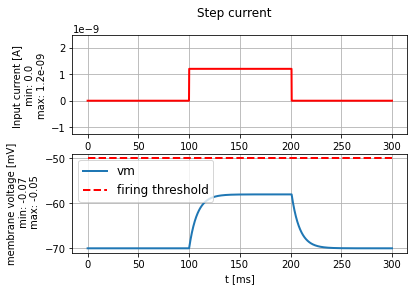

nr of spikes: 5


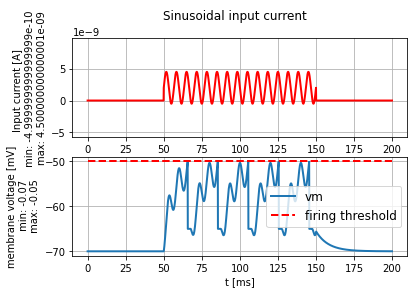

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
# start with importing the libraries we need

%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

In [2]:
# the default values 
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

In [3]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


So if we consider current such that we are exact below the firing threshold, we can assume that the membrane potential after some time of the current injection will be steady at the value $v_{thr}$. So the minimal current is $I = \frac{v_{thr}-v_{rest}}{R}$, which is equal to $I = 2nA$ 

## Exercise: minimal current to elicit a spike
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANCE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms
i_min = (FIRING_THRESHOLD-V_REST)/MEMBRANE_RESISTANCE


Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002
The minimal current to elicit a spike is > 2.0000000000000005e-09


<IPython.core.display.Javascript object>


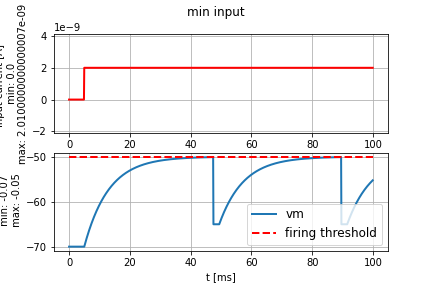

nr of spikes: 2


In [4]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
# in case your system supports it we recommend to use 
%matplotlib notebook

# get the default parameters: print them to the console and/or access the constants
LIF.print_default_parameters()

#calculate i_min
i_min = (LIF.FIRING_THRESHOLD-LIF.V_REST)/LIF.MEMBRANE_RESISTANCE
print("The minimal current to elicit a spike is > {}".format(i_min))

i_min += .01*b2.nA

# verify: create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= i_min)

# run the LIF model
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plt.figure()
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))



## Exercise: f-I Curve

1. The sketch should have the following behavior till $i_{min}$ current we have 0 Hz after this point  we have a jump to a particular frequency which approaches exponentiall a maximum frequency.
2. The maximum rate is constrained by the refractory time. So if we assume that we inject a huge current the final frequency that we can achive is $F_{max} = \frac{1}{t_{refractory}}= 333Hz$
3. see below

<IPython.core.display.Javascript object>


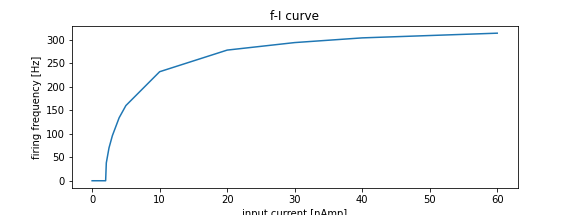

Text(0, 0.5, 'firing frequency [Hz]')

In [5]:
# actually here we start from amplitue 2 because we that at this point the plot will start to increase
amplitudes = [0., 2.0, 2.1, 2.5, 3, 4, 5, 10, 20, 30, 40, 60]
simtime_ms = 500
frequencies = np.zeros(len(amplitudes))

for i in range(len(amplitudes)):
    I_ampl = amplitudes[i]
    step_current = input_factory.get_step_current(
        t_start=0, t_end=simtime_ms, unit_time=b2.ms,
        amplitude= I_ampl*b2.namp)

    # run the LIF model
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = simtime_ms * b2.ms, abs_refractory_period=3*b2.ms)
    nr_spikes = spike_monitor.count[0]
    frequencies[i] = nr_spikes * 1000. / simtime_ms

# Note that actually here for input current 2.0nA the frequency is 0Hz and for 2.1nA is 38Hz
plt.figure(figsize=(8,3))
plt.plot(amplitudes, frequencies)
plt.title("f-I curve")
plt.xlabel("input current [nAmp]")
plt.ylabel("firing frequency [Hz]")

## Exercise: unknown neuron experiment

In [17]:
# get a random parameter set
random_parameters = LIF.get_random_param_set(random_seed=4388851)
# LIF.print_obfuscated_parameters(random_parameters)

<IPython.core.display.Javascript object>


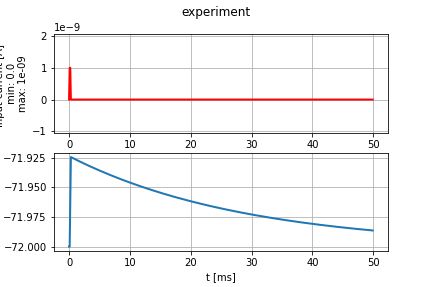

nr of spikes: 0


In [15]:
# specify a current to probe the neuron. 
test_current = input_factory.get_step_current(
    t_start=1, t_end=2, unit_time=0.1*b2.ms,
    amplitude= 1. * b2.namp)

# probe the neuron. pass the test current and the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)
plt.figure()
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")
print("nr of spikes: {}".format(spike_monitor.count[0]))

So the parameters that we need to find are:
1. $v_{rest}$ here we use the value that we see when we inject 0 current
2. $v_{threshold}$ here we inject a big current and we see the voltage that the neuron resets
3. $v_{reset}$ we use experiment 2 and we see what value take the neuron exactly after the spike time
4. $t_{refractory}$ we use experiment 2 and we see the time that the membrane is exactly $v_{rest}$ after the spike
5. $C$ we use a delta current (active only for one timestep). Following the written exercise 1.2, we know that $u(t + \Delta t) = u_{rest} + q/C$, where $q=I*\Delta t$. Here you need to change the scale of the current so the input is very fast
6. $\tau_m$ from experiment 5 we can find the time that the membrane potential becomes around 1/3 of the max value and this is our $tau_m$
7. You can compute $R$ by simulating with a constant current for a long amount of time such that $\frac{du}{dt} = 0$, you can then solve for $R$.

Note: This is one approach, you could also find other experiments that lead you to the same results.

In [18]:
# print the solution
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.07200000000000001
Reset voltage: -0.063
Firing threshold: -0.035
Membrane resistance: 11000000.0
Membrane time-scale: 0.029
Absolute refractory period: 0.001


## Exercise: sinusoidal input current

<IPython.core.display.Javascript object>


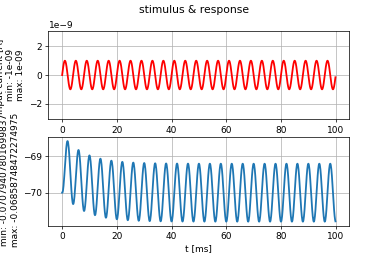

(<AxesSubplot:ylabel='Input current [A] \n min: -1e-09 \nmax: 1e-09'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.07079407801699837\n max: -0.06858748472274975'>)

In [14]:
# second example: sinusoidal current. note the higher resolution 0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(0, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 1 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 100 * b2.ms, firing_threshold=-50*b2.mV)

min_time = 0*b2.ms
max_time = 800*b2.ms
idx_recorded = (state_monitor[0].t>=min_time) & (state_monitor[0].t<=max_time)
out_signal = state_monitor[0].v[idx_recorded]
t_recorded = state_monitor[0].t[idx_recorded]
in_signal = sinusoidal_current(t_recorded,0)

plt.figure()
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="stimulus & response")

You can find the amplitude by dividing the max value from input current and the max value from output signal. 
You can find the phase by doing the following:
Find the time between the closest peaks of current and membrane and devided by the time of a period. Now this is the fraction for the period, so now if you multiply it with $2\pi$ you get the phase. You can get the sign depending if the output lags(come after) then we have positive otherwise the "output" leads and the sign is negative

In [16]:
# Finding the amplitude
peak_in = np.max(in_signal)
peak_vmem = -np.max(out_signal)
print("Amplitude", peak_vmem/peak_in)

# Finding the 
2*np.pi * (1/4) # numbers that I count from the plot
t_peak1 = np.argmax(in_signal)
t_peak2 = np.argmax(out_signal)
period = period = 1/ 250 / 0.0001
print('Phase: ', 2*np.pi * ((t_peak2-t_peak1)/period))

Amplitude 68.58748472 Mohm
Phase:  1.5707963267948966


<IPython.core.display.Javascript object>


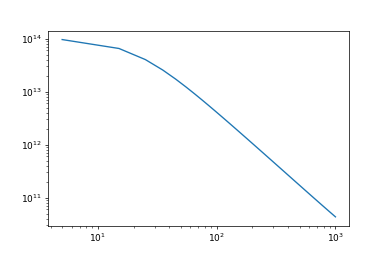

<IPython.core.display.Javascript object>


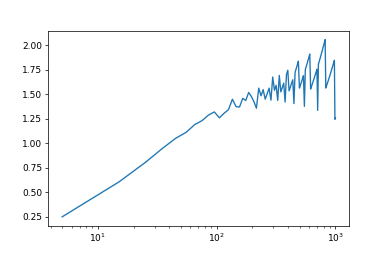

In [12]:
# now we are going to run the loop
frequencies = np.linspace(5, 1000, 100)
amplitudes = np.zeros(100)
phases = np.zeros(100)

for i, f in enumerate(frequencies):
    sinusoidal_current = input_factory.get_sinusoidal_current(0, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 0.5 * b2.namp, frequency=f*b2.Hz,
                                            direct_current=0. * b2.namp)

    # run the LIF model
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 100 * b2.ms, firing_threshold=-50*b2.mV)

    min_time = 0*b2.ms
    max_time = 1000*b2.ms
    idx_recorded = (state_monitor[0].t>=min_time) & (state_monitor[0].t<=max_time)
    out_signal = state_monitor[0].v[idx_recorded]
    t_recorded = state_monitor[0].t[idx_recorded]
    in_signal = sinusoidal_current(t_recorded,0)
    
    # here instead of checking the amplitude we check the power of the signal, something that
    # is commonly used in signal and systems
    peak_in = ((in_signal-in_signal.mean())**2).mean()
    peak_vmem = ((out_signal-out_signal.mean())**2).mean()
#     print(peak_in, peak_vmem)
    # Finding the 
    t_peak1 = np.where(np.diff(in_signal)<0)[0][0] # first peak
    t_peak2 = np.argmax(out_signal)
    period = 1/f / 0.0001 # i divide with 0.1 ms
    amplitudes[i] = peak_vmem/peak_in
    phases[i] = 2*np.pi * ((t_peak2-t_peak1)/period)

plt.figure()
plt.loglog(frequencies, amplitudes)
plt.figure()
plt.plot(frequencies, phases)
plt.xscale('log')
# be careful on the values on the x label from the second plot

Since we see that the amplitude goes down as we increase the input frequence we can see that we have a low-pass filter